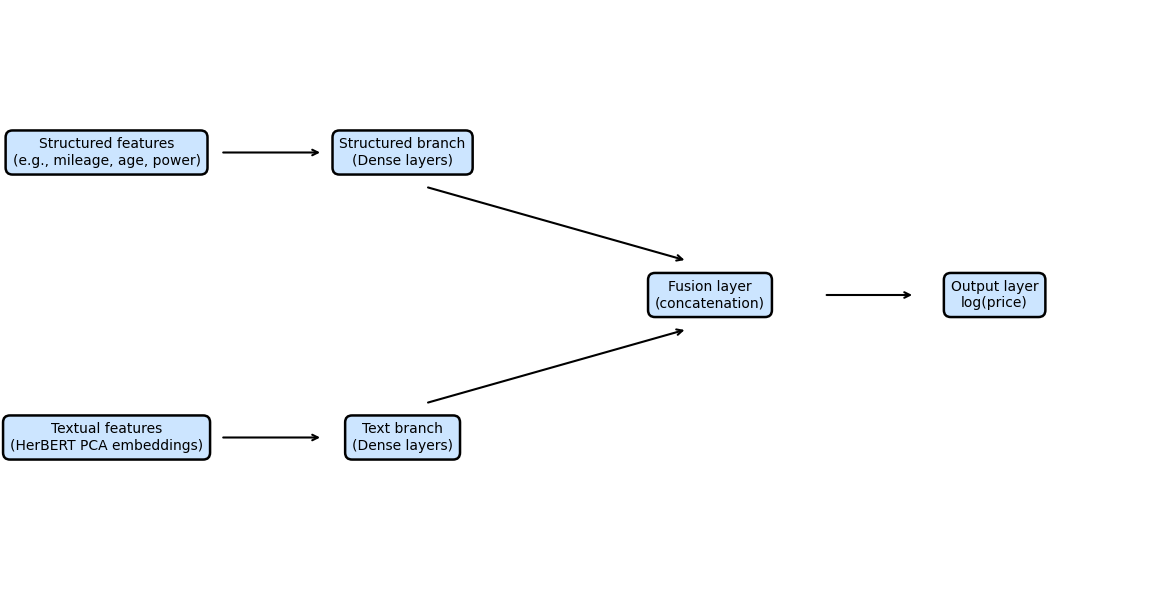

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Przygotowanie wykresu
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("off")  # wyłączenie osi

# Styl bloków i strzałek
box_style = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="#cce5ff", lw=1.8)
arrow_style = dict(arrowstyle="->", color="black", lw=1.5)

# Pozycje środków bloków
positions = {
    "structured": (0.07, 0.75),
    "text": (0.07, 0.25),
    "structured_mlp": (0.33, 0.75),
    "text_mlp": (0.33, 0.25),
    "concat": (0.6, 0.5),
    "output": (0.85, 0.5),
}

# Offsety do strzałek (aby nie wchodziły na tekst)
x_box_margin = 0.11  # dla poziomych strzałek
y_margin = 0.06      # dla ukośnych

# Rysowanie bloków z tekstem
def draw_box(label, pos):
    ax.text(
        pos[0], pos[1], label,
        ha="center", va="center",
        bbox=box_style, fontsize=10
    )

# Rysowanie strzałek z przesunięciem
def draw_arrow(start, end):
    x0, y0 = start
    x1, y1 = end

    if y0 == y1:  # poziome strzałki
        xytext = (x0 + x_box_margin-0.01, y0)
        xy = (x1 - x_box_margin + 0.04, y1)
    elif y0 > y1:  # z góry na środek
        xytext = (x0 + 0.02, y0 - y_margin)
        xy = (x1 - 0.02, y1 + y_margin)
    else:  # z dołu na środek
        xytext = (x0 + 0.02, y0 + y_margin)
        xy = (x1 - 0.02, y1 - y_margin)

    ax.annotate("", xy=xy, xytext=xytext, arrowprops=arrow_style)

# Bloki
draw_box("Structured features\n(e.g., mileage, age, power)", positions["structured"])
draw_box("Textual features\n(HerBERT PCA embeddings)", positions["text"])
draw_box("Structured branch\n(Dense layers)", positions["structured_mlp"])
draw_box("Text branch\n(Dense layers)", positions["text_mlp"])
draw_box("Fusion layer\n(concatenation)", positions["concat"])
draw_box("Output layer\nlog(price)", positions["output"])

# Strzałki
draw_arrow(positions["structured"], positions["structured_mlp"])
draw_arrow(positions["text"], positions["text_mlp"])
draw_arrow(positions["structured_mlp"], positions["concat"])
draw_arrow(positions["text_mlp"], positions["concat"])
draw_arrow(positions["concat"], positions["output"])

# Tytuł APA
#plt.title("Early Fusion architecture for used car price prediction", fontsize=13, pad=20)

# Eksport do pliku
plt.tight_layout()
plt.show()

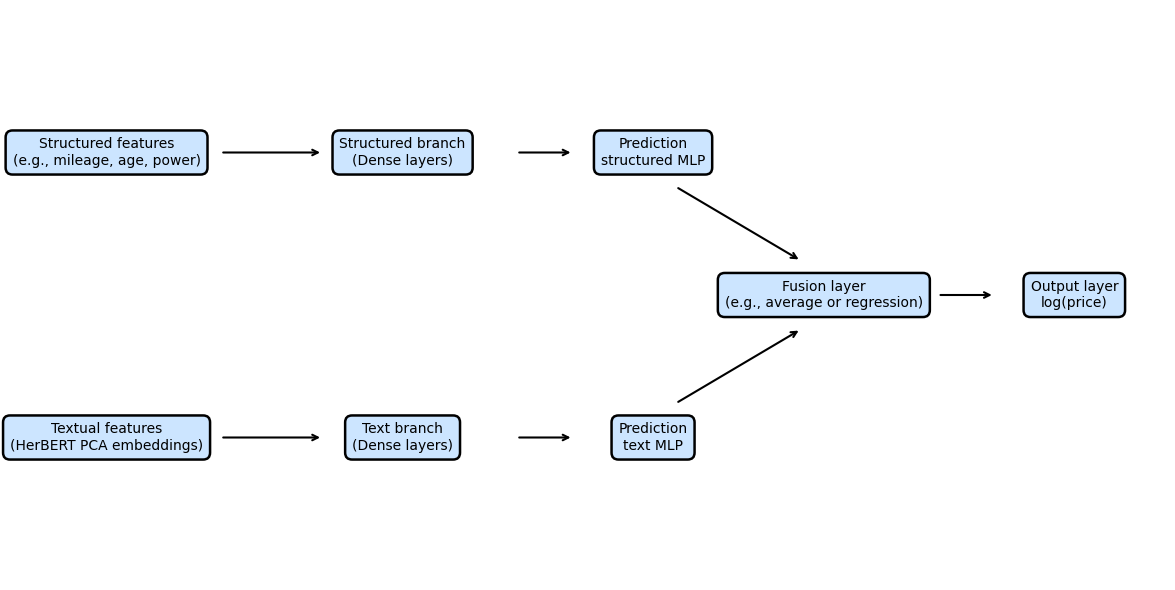

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Przygotowanie wykresu
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("off")  # wyłączenie osi

# Styl bloków i strzałek
box_style = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="#cce5ff", lw=1.8)
arrow_style = dict(arrowstyle="->", color="black", lw=1.5)

# Pozycje środków bloków
positions = {
    "structured": (0.07, 0.75),
    "text": (0.07, 0.25),
    "structured_mlp": (0.33, 0.75),
    "text_mlp": (0.33, 0.25),
    "pred_struct": (0.55, 0.75),
    "pred_text": (0.55, 0.25),
    "fusion": (0.7, 0.5),
    "output": (0.92, 0.5),
}

# Offsety do strzałek
x_box_margin = 0.11
y_margin = 0.06

# Rysowanie boxów z tekstem
def draw_box(label, pos):
    ax.text(
        pos[0], pos[1], label,
        ha="center", va="center",
        bbox=box_style, fontsize=10
    )

# Rysowanie strzałek z przesunięciem
def draw_arrow(start, end):
    x0, y0 = start
    x1, y1 = end

    if y0 == y1:  # poziome
        xytext = (x0 + x_box_margin - 0.01, y0)
        xy = (x1 - x_box_margin + 0.04, y1)
    elif y0 > y1:  # z góry
        xytext = (x0 + 0.02, y0 - y_margin)
        xy = (x1 - 0.02, y1 + y_margin)
    else:  # z dołu
        xytext = (x0 + 0.02, y0 + y_margin)
        xy = (x1 - 0.02, y1 - y_margin)

    ax.annotate("", xy=xy, xytext=xytext, arrowprops=arrow_style)

# Bloki wejściowe
draw_box("Structured features\n(e.g., mileage, age, power)", positions["structured"])
draw_box("Textual features\n(HerBERT PCA embeddings)", positions["text"])
draw_box("Structured branch\n(Dense layers)", positions["structured_mlp"])
draw_box("Text branch\n(Dense layers)", positions["text_mlp"])

# Niezależne predykcje
draw_box("Prediction\nstructured MLP", positions["pred_struct"])
draw_box("Prediction\ntext MLP", positions["pred_text"])

# Warstwa łącząca
draw_box("Fusion layer\n(e.g., average or regression)", positions["fusion"])
draw_box("Output layer\nlog(price)", positions["output"])

# Strzałki
draw_arrow(positions["structured"], positions["structured_mlp"])
draw_arrow(positions["text"], positions["text_mlp"])
draw_arrow(positions["structured_mlp"], positions["pred_struct"])
draw_arrow(positions["text_mlp"], positions["pred_text"])
draw_arrow(positions["pred_struct"], positions["fusion"])
draw_arrow(positions["pred_text"], positions["fusion"])
draw_arrow(positions["fusion"], positions["output"])

# Tytuł APA
#plt.title("Figure 47. Late Fusion architecture for used car price prediction", fontsize=13, pad=20)

# Zapis
plt.tight_layout()
plt.show()